# Nilearn: From fMRI to Sckit-learn

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pylab as plt
import os.path as op
%matplotlib inline

In [2]:
from nilearn import datasets
from nilearn import plotting
from nilearn import image

# By default the 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()
fmri_filename = haxby_dataset.func[0]

# Print the basic information on the datset
print('First subject functional nifti images (4D) are at" %s' %fmri_filename) #4D Data


Dataset created in C:\Users\jzm0144/nilearn_data\haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (37 seconds, 0 min)
Extracting data from C:\Users\jzm0144/nilearn_data\haxby2001\c2acb32a0dc9f8cb769ce50ba7dbd1b4\subj2-2010.01.14.tar.gz...

First subject functional nifti images (4D) are at" C:\Users\jzm0144/nilearn_data\haxby2001\subj2\bold.nii.gz


.. done.


# Preparing the fMRI volume for the model fitting

Very simple stepts:                                                             
1: Data Preprocessing                                                           
2: Feature Extraction/Engineering                                               
3: Model Fitting                                                               
4: Model Validation                                                             
5: Model Inspection                                                             

E:\Janzaib_Masood\Anaconda\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
C:\Users\jzm0144\AppData\Roaming\Python\Python37\site-packages\nilearn\plotting\displays.py:600: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(axes, collections.Sequence):


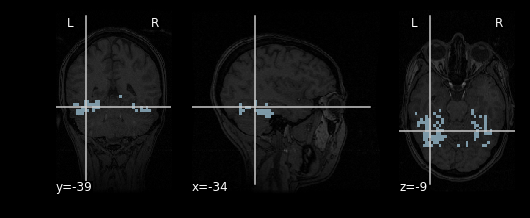

In [4]:
# Visualizing the mask
mask_filename = haxby_dataset.mask_vt[0]
plotting.plot_roi(mask_filename, bg_img=haxby_dataset.anat[0], cmap = 'Paired')

## Masking/ Vectorizing the data

In [6]:

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img = mask_filename, standardize=True)
masker

NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
      mask_args=None,
      mask_img='C:\\Users\\jzm0144/nilearn_data\\haxby2001\\subj2\\mask4_vt.nii.gz',
      mask_strategy='background', memory=Memory(location=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [7]:
# Fitting the transformer initializes it to operate on new data
masker.fit(fmri_filename)

C:\Users\jzm0144\AppData\Roaming\Python\Python37\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
      mask_args=None,
      mask_img='C:\\Users\\jzm0144/nilearn_data\\haxby2001\\subj2\\mask4_vt.nii.gz',
      mask_strategy='background', memory=Memory(location=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [8]:
# Now let's transform our fMRI data
fmri_masked = masker.transform(fmri_filename)

C:\Users\jzm0144\AppData\Roaming\Python\Python37\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


In [9]:
print(fmri_masked.shape)

(1452, 464)


## De-vectorizing back to a Nifti Image

In [10]:
nifti_img = masker.inverse_transform(fmri_masked)
print(nifti_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (40, 64, 64, 1452)
affine: 
[[  -3.5      0.       0.      68.25 ]
 [   0.       3.75     0.    -118.125]
 [   0.       0.       3.75  -118.125]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [   4   40   64   64 1452    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    3.5   3.75  3.75  1.    1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip 

C:\Users\jzm0144\AppData\Roaming\Python\Python37\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


E:\Janzaib_Masood\Anaconda\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


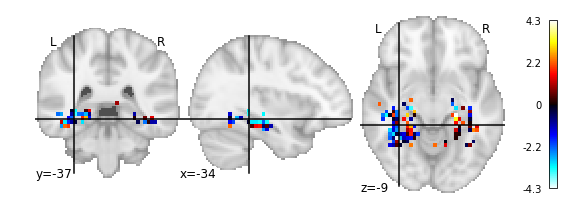

In [11]:
plotting.plot_stat_map(image.index_img(nifti_img, 2))

In [13]:
# Note that this will work fine
nifti_img = masker.inverse_transform(fmri_masked[:10])
print(nifti_img.shape)

(40, 64, 64, 10)


In [14]:
# Or even this...
nifti_img = masker.inverse_transform(fmri_masked[0])
print(nifti_img.shape)

C:\Users\jzm0144\AppData\Roaming\Python\Python37\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


(40, 64, 64)


In [15]:
# But changing the number of features will break it...
nifti_img = masker.inverse_transform(fmri_masked[:, :-1])

C:\Users\jzm0144\AppData\Roaming\Python\Python37\site-packages\nilearn\_utils\cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


TypeError: X must be of shape (samples, 464).

# #Vectorizing (by itself) removes information

Vectorizing is often the final step of the preprocessing chain before we actually fit a model on our data. It often leaves the data in a state with minimal knowledge about the 